# Part I - (Prosper Loan Data Exploration)
## by (Seun Olukanmi)

## Introduction
> **Introduction to the dataset**
> The data set contains 113,937 loans with 81 features on each loan, including loan amount, interest rate (or borrower rate), current loan status, borrower income, and a lot more. From observation of the data dictionary, the features can be classified into two (2) main categories namely: borrower features, and loan performance data.

## Preliminary Wrangling

In [1]:
# importing necessary packages and setting plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

> Loading the dataset and examining its structure

In [2]:
#Reading in the dataset into a dataframe
df = pd.read_csv('prosperLoanData.csv')

In [3]:
#Examining the number of rows and column in the dataset
df.shape

(113937, 81)

In [4]:
#Looking at the first five rows of the dataset
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [5]:
#Examining the variable types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [6]:
#Examining the basic statistics of the dataset
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


### The structure of the dataset

> As mentioned in the introduction to the dataset and as revealed by the functions above, the dataset contains 113,937 rows (records) of loan data that is described by 81 features/variables (columns). Most of the features are numerical and categorical in nature. 

### My main feature(s) of interest in the dataset

> For this analysis, I am interested in the relationship among several variables in the dataset such as:
I am interested in discovering the relationship between the loan amount given/taken out and several borrower features such as the employment status, the occupation, and the income range? I may also explore features that indicate wheter a loan will be paid back or the borrower will default.


### Features in the dataset that may help support the investigation into my feature(s) of interest

> Though there are 81 features, the variables that I think will support the investigations include: LoanOriginalAmount, LoanStatus, ProsperRating (Alpha), CreditGrade, ProsperRating, IncomeRange, IncomeVerifiable, EmploymentStatus, Occupation, DebtToIncomeRatio etc
Any other variable needed will be used as well.

## Univariate Exploration

> In this section, the distribution of the individual variables will be investigated


### Question 1: 
What is the distribution of the loan original amount?

In [7]:
df.LoanOriginalAmount.value_counts()

4000     14333
15000    12407
10000    11106
5000      6990
2000      6067
         ...  
5284         1
7936         1
1201         1
10593        1
4292         1
Name: LoanOriginalAmount, Length: 2468, dtype: int64

### Visualization

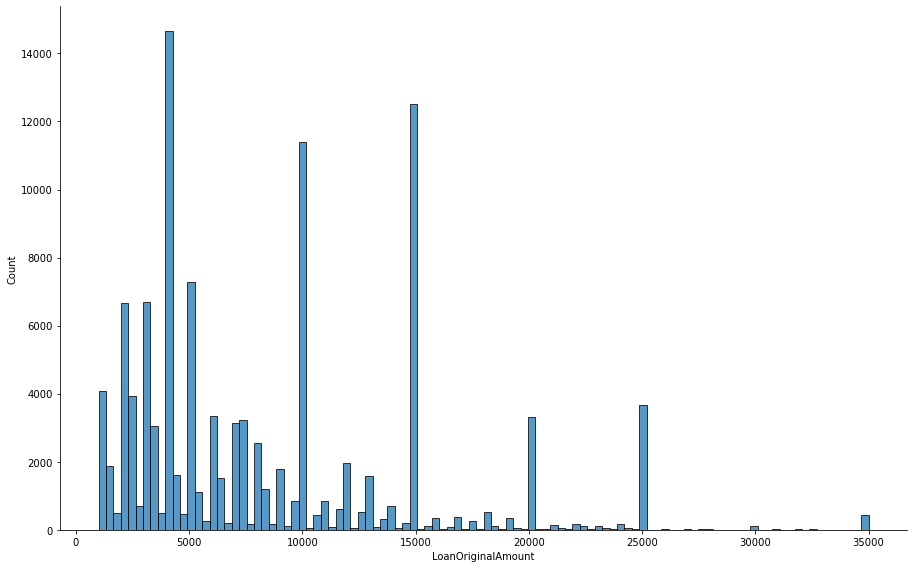

In [8]:
#creating a distribution plot to answer the question above
sns.displot(data = df, x = 'LoanOriginalAmount', height = 8, aspect = 1.6);

In [9]:
#investigating the basic descriptive characteristics of the loanOriginalAmount
df.LoanOriginalAmount.describe()

count    113937.00000
mean       8337.01385
std        6245.80058
min        1000.00000
25%        4000.00000
50%        6500.00000
75%       12000.00000
max       35000.00000
Name: LoanOriginalAmount, dtype: float64

### Observation: 
We can observe from the distribution plot above that the loan amount tends to be right skewed with the most frequently loaned amount being 4000. Above the loan value of 5000, there are relative spikes at each increment of 5000.

### Question 2: 
How many of the borrowers have a job?

In [10]:
df.EmploymentStatus.value_counts()

Employed         67322
Full-time        26355
Self-employed     6134
Not available     5347
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

### Visualization

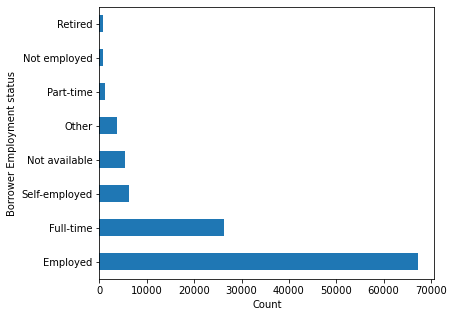

In [11]:
#Ploting a horizontal bar that displays the employment status of borrowers
plt.figure(figsize=(6,5))
df.EmploymentStatus.value_counts().plot(kind = 'barh')
plt.ylabel('Borrower Employment status')
plt.xlabel('Count');

### Observation

#### The visualization above shows 8 employment statuses. The "Employed' status which is the largest percentage seems ambiguous since someone with this status can still belong to other employment statuses.  One way to deal with this may be to combine 'Full-Time', 'Self-employed', 'Part-time' statuses into 'Employed' and have just a single status for all the employed borrowers. A minority class is the 'other' status which could represent employment state not captured by the listed options.

In [12]:
#replacing the 'Full-time', 'Self-employed', and 'Part-time' employment statuses with a single status 'Employed'
df['EmploymentStatus'] = df['EmploymentStatus'].replace(['Full-time', 'Self-employed', 'Part-time'],'Employed')

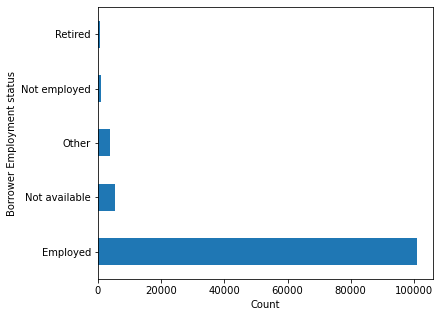

In [13]:
#Creating a new visualization after combining the 'employed' statuses
plt.figure(figsize=(6,5))
df.EmploymentStatus.value_counts().plot(kind = 'barh')
plt.ylabel('Borrower Employment status')
plt.xlabel('Count');

#### From the new visualization, most of the borrowers are employed while the other employment statuses are in the minority.

### Question 3:
### What is the distribution of states of the borrowers?

### Visualization

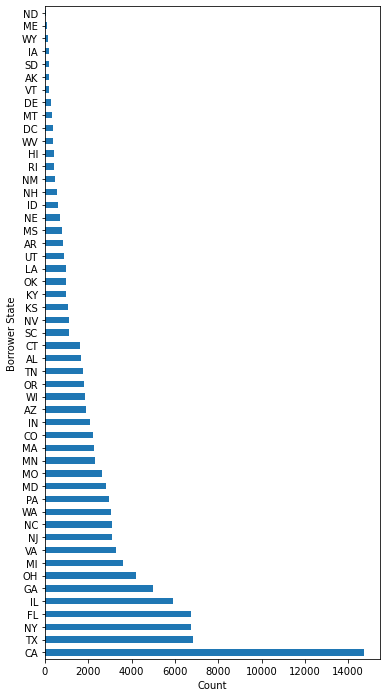

In [14]:
plt.figure(figsize=(6,12))
df.BorrowerState.value_counts().plot(kind = 'barh')
plt.ylabel('Borrower State')
plt.xlabel('Count');

### Observation:
Most of the borrowers seem to be from California

### Question 4:
### What is the distribution of occupation of the borrowers? 

### Visualization

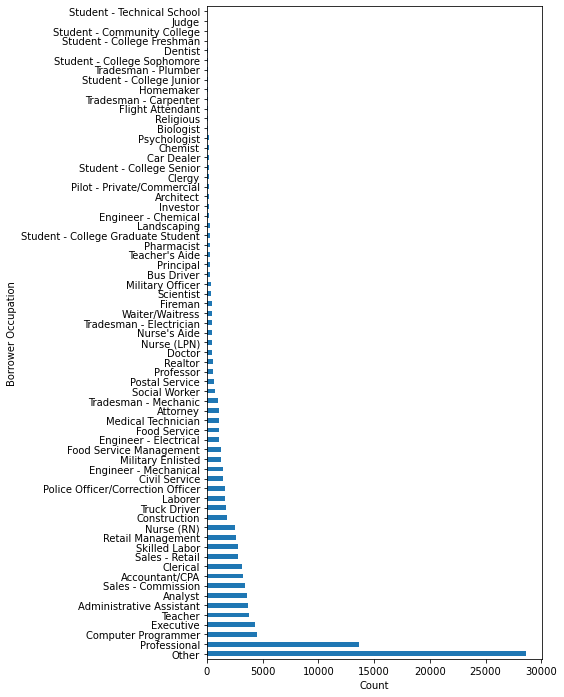

In [15]:
plt.figure(figsize=(6,12))
df.Occupation.value_counts().plot(kind = 'barh')
plt.ylabel('Borrower Occupation')
plt.xlabel('Count');

### Observation:
Apart from "other" which is the highest, the next largest category of borrowers are professionals

### Question 5:
### What is the distribution of the loan status?

In [16]:
df.LoanStatus.value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

### Visualization

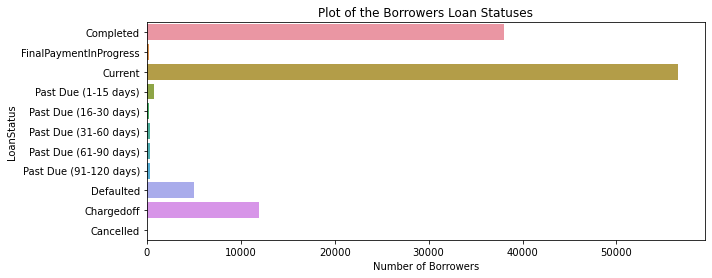

In [17]:
# I created an ordered list of the loan statuses following the inherent order of the values
orderedloanStatus = ['Completed','FinalPaymentInProgress','Current','Past Due (1-15 days)','Past Due (16-30 days)',
                 'Past Due (31-60 days)','Past Due (61-90 days)','Past Due (91-120 days)','Defaulted','Chargedoff','Cancelled']
loanStatuses = pd.api.types.CategoricalDtype(ordered = True, categories = orderedloanStatus)
df['LoanStatus'] = df['LoanStatus'].astype(loanStatuses)

##Now creating the horizontal bar chart using the sns.countplot function
plt.figure(figsize = [10, 4])
sns.countplot(data = df, y = 'LoanStatus')
plt.xlabel('Number of Borrowers')
plt.title('Plot of the Borrowers Loan Statuses');

### Observation:
#### It can be observed from the plot that the loan status "current" is the most frequently occuring followed by the "completed" status.

### Question 6:
What is the income range of the borrowers?

In [18]:
df.IncomeRange.value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

#### Looking at the values returned above, I think the $0 income range, the not employed, and the not displayed categories can be combined to reduce ambiguity. I will assume the 'Not displayed' and 'Not employed' also have no income

In [19]:
#Combining the 3 categories 
df['IncomeRange'].replace(['Not displayed', 'Not employed'], '$0', inplace = True)

In [20]:
#Confirming the three categories have been combined
df.IncomeRange.value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
$0                 9168
$1-24,999          7274
Name: IncomeRange, dtype: int64

### Visualization

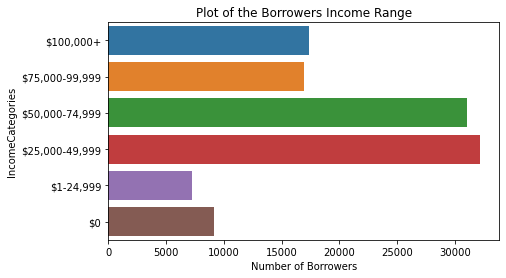

In [21]:
#I have to create ordinal categories (from largest to smallest) for the income range before creating the chart
ordinalCategory = ['$100,000+', '$75,000-99,999', '$50,000-74,999', '$25,000-49,999', '$1-24,999','$0']
orderedVar = pd.api.types.CategoricalDtype(ordered = True, categories = ordinalCategory)
df['IncomeRange'] = df['IncomeRange'].astype(orderedVar)

#Now creating the horizontal bar chart using the sns.countplot function
plt.figure(figsize = [7, 4])
sns.countplot(data = df, y = 'IncomeRange')
plt.xlabel('Number of Borrowers')
plt.ylabel('IncomeCategories')
plt.title('Plot of the Borrowers Income Range');

### Observation


#### It can be seen from the bar chart that most of the borrowers fall in the 25000 - 49999 range closely followed by the 50000 - 74999 income range. The 75k - 99999 and the above 100,000 range are closely similar in magnitude.

### Question 7: Investigate the credit grade of the borrowers
    

In [22]:
df.CreditGrade.value_counts()

C     5649
D     5153
B     4389
AA    3509
HR    3508
A     3315
E     3289
NC     141
Name: CreditGrade, dtype: int64

### Visualization

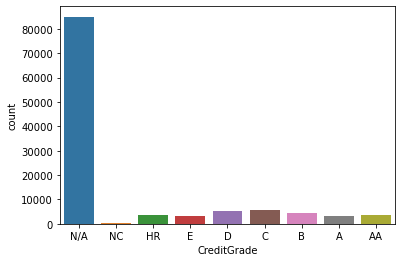

In [23]:
# To create a visualization, an ordered list is generated using the inherest list in the values
df['CreditGrade'] = df['CreditGrade'].fillna('N/A') #filling the empty cells with N/A
grades = ['N/A', 'NC', 'HR', 'E', 'D', 'C', 'B', 'A', 'AA'] #ordered from worst to best
creditGrades = pd.api.types.CategoricalDtype(categories= grades, ordered = True)
df['CreditGrade'] = df['CreditGrade'].astype(creditGrades)

# Now, creating a vertical bar chat
sns.countplot(data = df, x = 'CreditGrade');

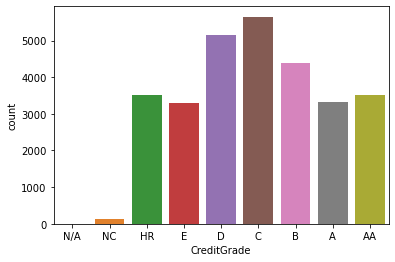

In [24]:
#Doing another visualization where the N/A's are dropped in order to view more effectively
df_credit_graded = df.query('CreditGrade != "N/A"')
sns.countplot(data = df_credit_graded, x = 'CreditGrade');

### Observation:
#### As seen more clearly when the NAs are dropped, the C credit rating is the highest assigned to borrowers closely followed by the D rating. There is also a high number of NA's (Borrowers who don't have credit grade)

### Question 8:
#### Investigate the prospeRatings of the borrowers

In [25]:
## I will be using the ProsperRating (ALpha) column
df['ProsperRating (Alpha)'].value_counts()

C     18345
B     15581
A     14551
D     14274
E      9795
HR     6935
AA     5372
Name: ProsperRating (Alpha), dtype: int64

### Visualization

In [26]:
# Here, I am renaming the 'ProsperRating (Alpha)' column to remove the space in the column name
df.rename(columns = {'ProsperRating (Alpha)':'ProsperRating_Alpha'}, inplace = True)

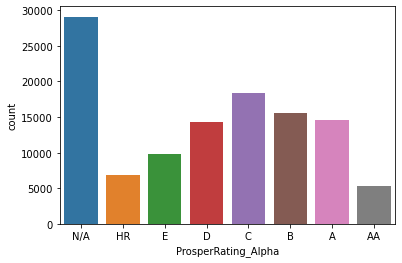

In [27]:
### An ordered list of the ratings is created following the inherent order of the values
pRatings = ['N/A', 'HR', 'E', 'D', 'C', 'B', 'A', 'AA'] #ordered from worst to best
pRatings_type = pd.api.types.CategoricalDtype(categories= pRatings, ordered = True)
df['ProsperRating_Alpha'] = df['ProsperRating_Alpha'].astype(pRatings_type)

#I filled in the NaNs with "N/A" 
df['ProsperRating_Alpha'] = df['ProsperRating_Alpha'].fillna('N/A')
# Now, creating a vertical bar chat
sns.countplot(data = df, x = 'ProsperRating_Alpha');

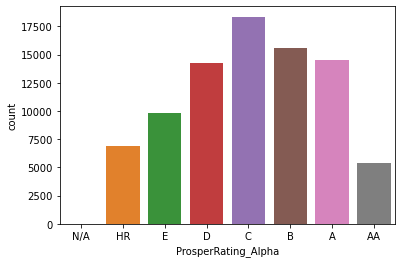

In [28]:
### #Doing another visualization where the N/A's are dropped in order to view more effectively
df_prosper_rating = df.query('ProsperRating_Alpha != "N/A"')
sns.countplot(data = df_prosper_rating, x = 'ProsperRating_Alpha');

### Observation:
#### Similar to the CreditGrade rating, it is also observed that the C rating is the highest prosper rating assigned to borrowers. As in the CreditGrade rating, there is also large number of NA's showing a lot of borrowers without rating.

### Question 9:
#### What do the borrowers debt to income ratio look like?

### Visualization

<Figure size 720x360 with 0 Axes>

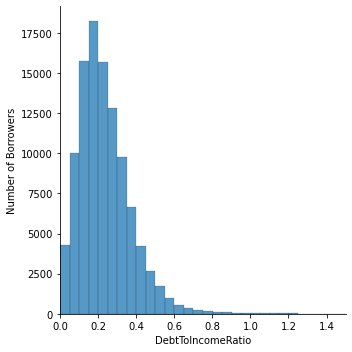

In [29]:
plt.figure(figsize = [10,5])
sns.displot(data = df, x = 'DebtToIncomeRatio', bins = 200);
plt.ylabel('Number of Borrowers')
plt.xlim(0,1.5); #In order to zoom into the distribution

### Observation
#### From the above visualization, the shape of the distribution seems normal. It can be observed from the plot above that most of the borrowers have a debt to income ratio of around 20%. This information is useful for an investor or creditor to see if the borrower will be able to pay back even if there is a case of temporary income loss

### Question 10:
#### Distribution of Delinquencies in the last 7 years

In [30]:
df['DelinquenciesLast7Years'].value_counts()

0.0     76439
1.0      3967
3.0      3183
2.0      2879
4.0      2592
        ...  
97.0        4
85.0        3
94.0        3
98.0        3
93.0        2
Name: DelinquenciesLast7Years, Length: 100, dtype: int64

### Visualization:
#### Below is a histogram plot to show the records of delinquencies in the last 7 years among the borrowers

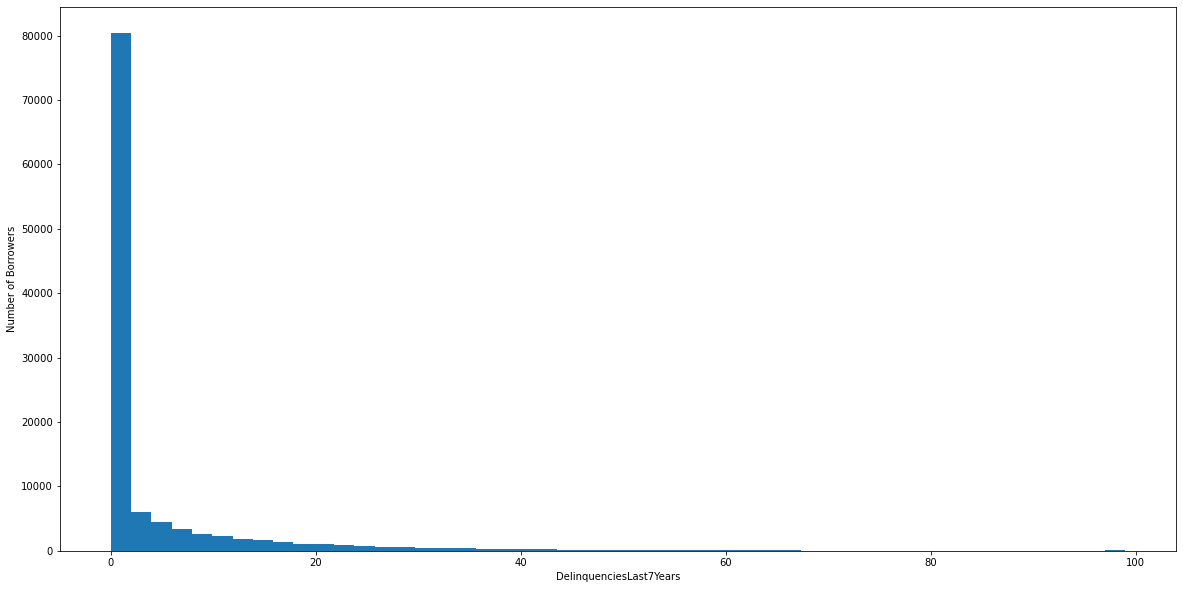

In [31]:
plt.figure(figsize=(20,10))
plt.hist(data=df, x = 'DelinquenciesLast7Years', bins=50)
plt.xlabel('DelinquenciesLast7Years')
plt.ylabel('Number of Borrowers');

### Observation

### It can be observed that most of the borrowers do not have record of delinquencies in the last 7 years. We can zoom in more into the visualization of the other borrowers with delinquencies > 0

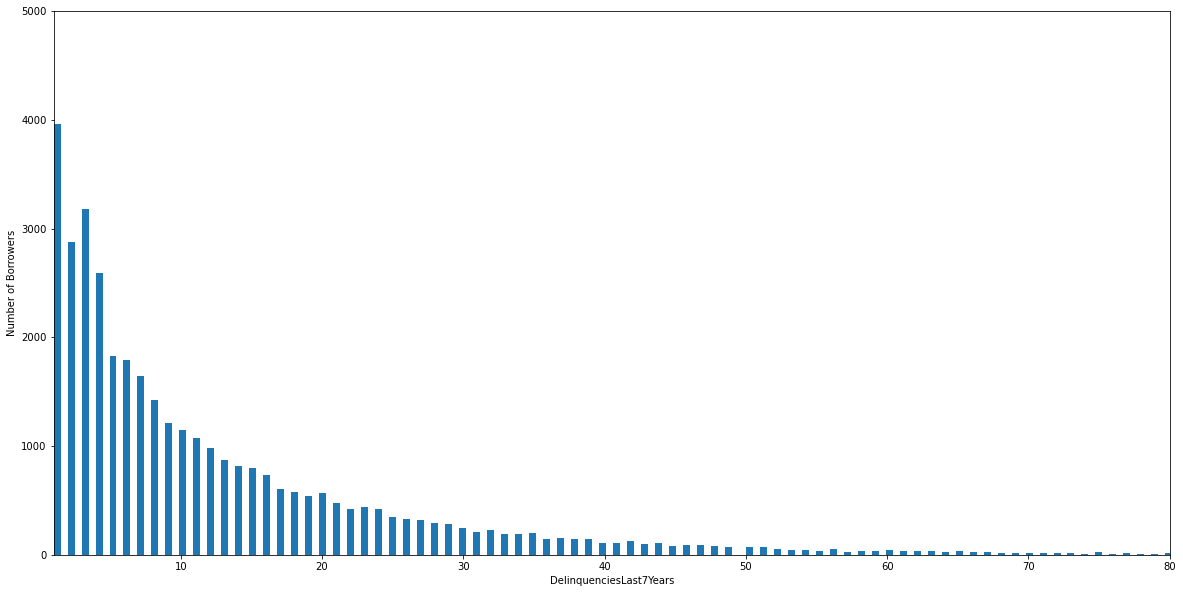

In [32]:
#Adjusting the x and y axis limits to zoom into the distribution
plt.figure(figsize=(20,10))
plt.hist(data=df, x = 'DelinquenciesLast7Years', bins=200)
plt.xlabel('DelinquenciesLast7Years')
plt.ylabel('Number of Borrowers')
plt.xlim(1,80)
plt.ylim(0,5000);

### Discusion on the distribution(s) of the variable(s) of interest. 

> Under the univariate variable exploration, I have considered the following variables: the distribution of the original amount, the employment status of the boroowers, distribution of the state where the borrowers come from, the distribution of the borrowers' occupation, distribution of the loan status, investigation of the borrowers' CreditGrade and ProsperRating, The borrowers' income to debt ratio, and the records of delinquencies in the last 7 years.
For the employment status of borrowers, I combined the 'Full-Time', 'Self-employed', 'Part-time' statuses all into 'Employed' to have just a single status for all the employed borrowers.
Also for the income range of the borrowers, the 'not employed' and the 'not displayed' categories were merged with the '$0 income range' to reduce ambiguity. This was based on the assumption that the 'Not displayed' and 'Not employed' also have no income

## Bivariate Exploration

### Question 11:
#### What is the relationship between the income range of borrowers and the loan original amounts?

### Visualization

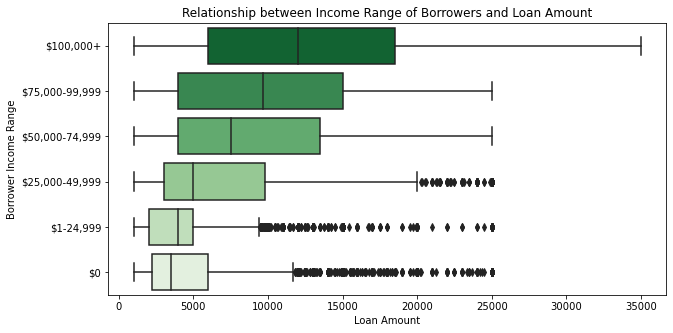

In [33]:
# boxplot showing relationship between income range of borrowers and the loan amount
plt.figure(figsize = [10, 5])
sns.boxplot(data = df, y = 'IncomeRange', x = 'LoanOriginalAmount', palette = "Greens_r")
plt.ylabel('Borrower Income Range')
plt.xlabel('Loan Amount')
plt.title('Relationship between Income Range of Borrowers and Loan Amount');

### Observation:
#### It can be observed that all income groups have the same minimum loan amount. It can also be observed that the median loan amount increases as the income range of the borrowers increase. The maximum loan amount also generally increases with income range. The box plot shows that some borrowers in the 3 lower income ranges (from 0 to 49,999) are outliers, borrowing up to a maximum of 25,000. The borrowers in the income range 100,000 and above are the only group that took loan above 25,000 

### Question 12:
#### What is the relationship between the borrower's prosper rating and the loan amounts?

### Visualization

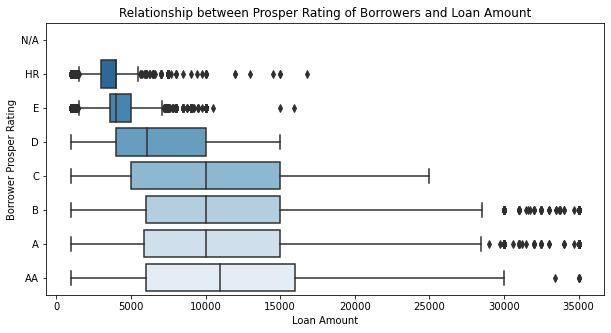

In [34]:
# boxplot showing relationship between prosper rating of borrowers and the loan amount. The N/A's were dropped
plt.figure(figsize = [10, 5])
sns.boxplot(data = df_prosper_rating, y = 'ProsperRating_Alpha', x = 'LoanOriginalAmount', palette = "Blues_r")
plt.ylabel('Borrower Prosper Rating')
plt.xlabel('Loan Amount')
plt.title('Relationship between Prosper Rating of Borrowers and Loan Amount');

### Observation:
#### As seen from the box plot, the poorer the rating, the lower the loan amount. From the univariate exploration of the loan amounts, 4000 was the highest. The plot above seems to show that generally most of the 4000 loans were taken by the poorly rated borrowers. There are some outliers though.

### Question 13:
#### What is the relationship between borrower's employment status and the loan amounts?

### Visualization

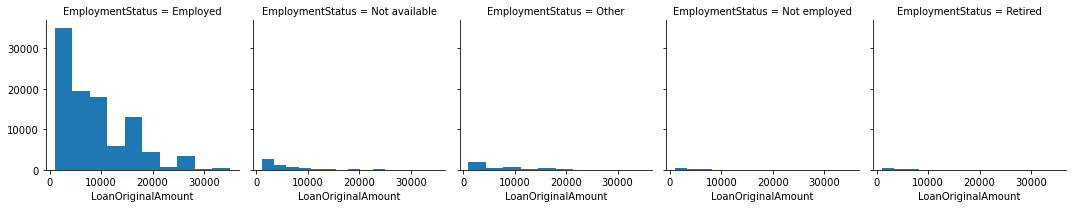

In [35]:
empStatus_LoanAmount = sns.FacetGrid(data = df, col = 'EmploymentStatus');
empStatus_LoanAmount.map(plt.hist, 'LoanOriginalAmount');

### Observation:
#### As mentioned before under the univariate exploration, the above visualiazation confirms that most of the borrowers are employed. Within, the employed group, the majority take lower loan amounts. It can be seen that generally, the higher the loan amount, the fewer the number of borrowers across all employment statuses.

### Question 14:
### What is the relationship between the borrowers' ProsperRating and their DebtToIncomeRatio?

### Visualization

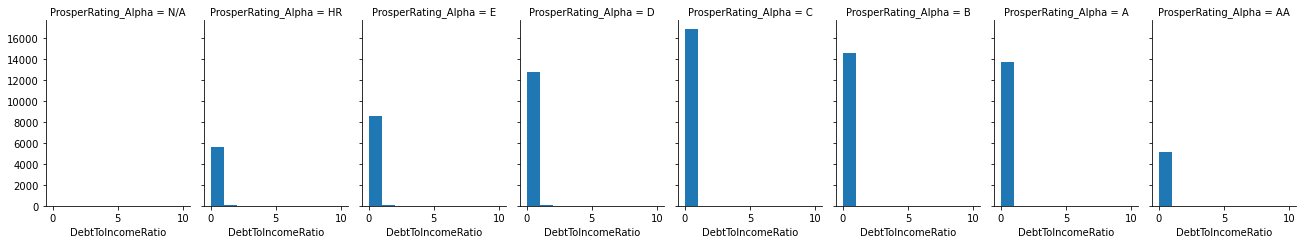

In [36]:
DebtToIncome_ProsperRating = sns.FacetGrid(data = df_prosper_rating, col = 'ProsperRating_Alpha', height = 3.5, aspect =0.65)
DebtToIncome_ProsperRating.map(plt.hist, 'DebtToIncomeRatio')

### Observation

#### From the above visualization, there is no variability in the DebtToIncomeRatio of the borrowers for each ProperRating category. The plot also confirms the 'C' prosperRating as the most frequently occuring.

### Relationships observed in the bivariate investigation

>  For the relationship between borrowers' income group and the loan amounts they take, it was observed that all income groups had the same minimum loan amount. It could also be observed that the median loan amount increased as the income range of the borrowers increased. The maximum loan amount also generally increased with income range. 
For the relationship between borrowers' prosper rating and the loan amount taken, the box plot showed that the poorer the rating, the lower the loan amount. 
For the relationship between the borrowers' employment status and the loan amount, the facet grid confirms that most of the borrowers are employed. Within, the employed group, the majority took lower loan amounts. It could be seen that generally, the higher the loan amount, the fewer the number of borrowers across all employment statuses.

## Multivariate Exploration

### Question 15:
#### What is the relationship between the loan amount given/taken out and a borrower indicating they have the required documentation to support their income?  

### Visualization

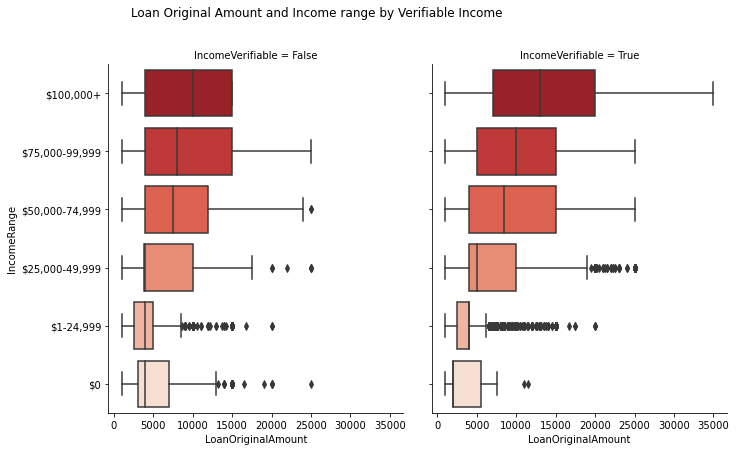

In [37]:
#Creating a multivariate visualization of loan amount taken and income range by verifiable income
ordinalCategory = ['$100,000+', '$75,000-99,999', '$50,000-74,999', '$25,000-49,999', '$1-24,999','$0']
box = sns.FacetGrid(data = df_prosper_rating, col = 'IncomeVerifiable', height = 3)
box.map(sns.boxplot, 'LoanOriginalAmount', 'IncomeRange', order=ordinalCategory, palette = "Reds_r")
plt.suptitle('Loan Original Amount and Income range by Verifiable Income', y = 1.0)
box.fig.set_size_inches(12,7);


### Observation
#### For borrowers with verifiable income and those without supporting documents to verify their income, the median loan amount increases as income range increases. However, the overall maximum loan amount given/taken out is significantly higher for borrowers with verifiable income. Only borrowers with verifiable income were given loan amounts beyond 25,000.

## Conclusions
> In conclusion, I explored the Prosper loan data using univariate, bivariate, and multivariate analysis/visualizations to answer my question of interest which is: finding the relationship between the loan amount given given/taken out and several borrower features in the dataset.
A summary of my findings is given below:
> 1. It was observed that the most frquently loaned amount is 4000. 
> 2. Most of the borrowers are employed and a majority are from California.
> 3. Apart from "other" which is the highest, the next largest category of borrowers are professionals
> 4. It can be seen from the bar chart that most of the borrowers fall in the 25000 - 49999 range closely followed by the 50000 - 74999 income range. 
> 5. The C prosper rating is the highest assigned to borrowers. 
> 6. It was also observed that most of the borrowers have a debt to income ratio of around 20% 
> 7. Most of the borrowers do not have record of delinquencies in the last 7 years. 
> 8. It was observed that the median loan amount increases as the income range of the borrowers increase. The maximum loan amount also generally increases with income range. The borrowers in the income range 100,000 and above are the only group that took loan above 25,000 
> 9. The poorer the rating of the borrower, the lower the loan amount given/taken out. 
> 10. Only borrowers with verifiable income were given loan amounts above 25,000.